In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

Estimated Bandwidth (Reference): 32.61


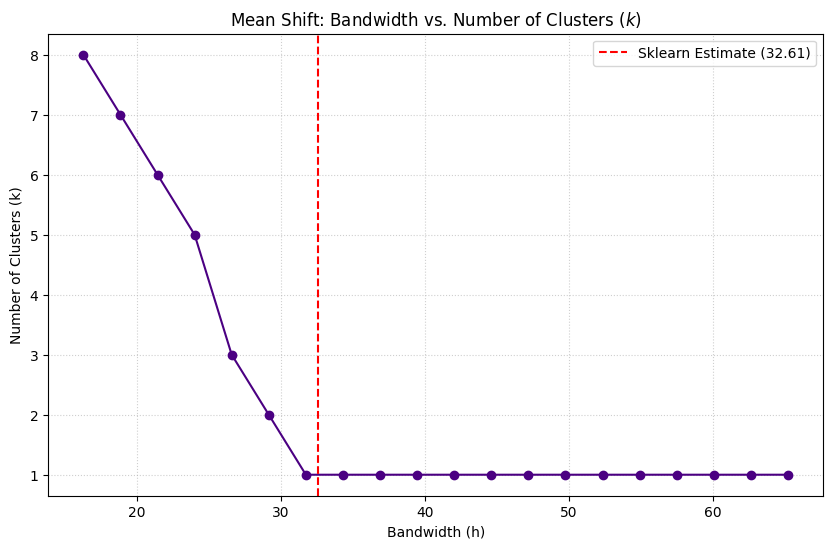

In [6]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# --- 2. Define Bandwidth Range to Test ---
# Use scikit-learn's estimate_bandwidth as a reference point
estimated_bw = estimate_bandwidth(x, quantile=0.3)
print(f"Estimated Bandwidth (Reference): {estimated_bw:.2f}")

# Define a range of bandwidth values centered around the estimate
bandwidth_range = np.linspace(estimated_bw * 0.5, estimated_bw * 2.0, num=20)

# --- 3. Iterate and Collect Results ---
n_clusters_list = []

for bw in bandwidth_range:
    # Initialize and fit the MeanShift model
    # We use 'bin_seeding=True' for better performance
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(x)

    # Get the number of unique cluster labels found
    n_clusters = len(np.unique(ms.labels_))
    n_clusters_list.append(n_clusters)
    # Optional: Print progress
    # print(f"BW: {bw:.2f}, Clusters: {n_clusters}")


# --- 4. Plotting the Heuristic Curve ---
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_range, n_clusters_list, marker='o', linestyle='-', color='indigo')

# Add a vertical line at the scikit-learn estimated bandwidth
plt.axvline(x=estimated_bw, color='red', linestyle='--', label=f'Sklearn Estimate ({estimated_bw:.2f})')

plt.title('Mean Shift: Bandwidth vs. Number of Clusters ($k$)')
plt.xlabel('Bandwidth (h)')
plt.ylabel('Number of Clusters (k)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()